In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Libreta para analizar la energ'ia solar m'axima en un d'ia y graficarla 

* identifique el d'ia con mayor energ'ia solar Ig, graficarlo, guardarlo y regrese   el d'ia
<!-- * Compara dos d'ias de radiaci'on solar, por default con el d'ia con mayor energ'ia solar  -->
* Grafica temperatura y humedad relatica de un d'ia espec'ifico y guardarla con el nombre del d'ia

In [2]:
file = '../../data/temixco.csv'
df = pd.read_csv(file,index_col=0,parse_dates=True)
df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-31 22:20:00', '2018-12-31 22:30:00',
               '2018-12-31 22:40:00', '2018-12-31 22:50:00',
               '2018-12-31 23:00:00', '2018-12-31 23:10:00',
               '2018-12-31 23:20:00', '2018-12-31 23:30:00',
               '2018-12-31 23:40:00', '2018-12-31 23:50:00'],
              dtype='datetime64[ns]', name='time', length=52560, freq=None)

In [3]:
df['E'] = df.Ig.resample('D').sum()*(1/6)
diaEmax= df.E.idxmax()
print('El dia con mayor energia solar es:',diaEmax )

El dia con mayor energia solar es: 2018-06-27 00:00:00


In [4]:
diaEmax

Timestamp('2018-06-27 00:00:00')

In [5]:
diaEmax.strftime('%Y-%m-%d')

'2018-06-27'

In [6]:
diaEmax.strftime('%Y-%m-%d').replace('-','')

'20180627'

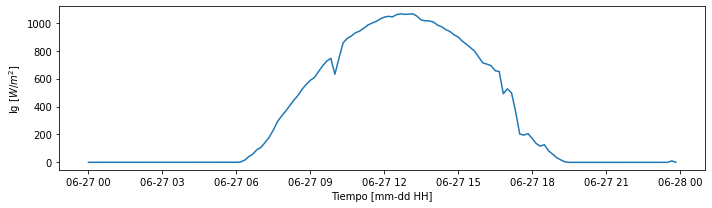

In [7]:
fig, ax = plt.subplots(figsize=(10,3))
fecha = diaEmax.strftime('%Y-%m-%d')
ax.plot(df.Ig.loc[fecha])

ax.set_xlabel('Tiempo [mm-dd HH]')
ax.set_ylabel('Ig [$W/m^2$]')
nombre = diaEmax.strftime('%Y-%m-%d').replace('-','') + '_Ig.pdf'
archivo = '../../img/' + nombre
# archivo
plt.tight_layout()
plt.savefig(archivo)
# ax.legend()

### Vamos a armar la primera funcion

In [8]:
def find_Emax(df):
    ''' Funcion que encuentra el dia con mayor energia solar, lo grafica
    input: Dataframe que contenga Ig
    output: Timestamp '''
    df['E'] = df.Ig.resample('D').sum()*(1/6)
    diaEmax= df.E.idxmax()
    print('El dia con mayor energia solar es:',diaEmax )
    fig, ax = plt.subplots(figsize=(10,3))
    fecha = diaEmax.strftime('%Y-%m-%d')
    ax.plot(df.Ig.loc[fecha])

    ax.set_xlabel('Tiempo [mm-dd HH]')
    ax.set_ylabel('Ig [$W/m^2$]')
    nombre = diaEmax.strftime('%Y-%m-%d').replace('-','') + '_Ig.pdf'
    archivo = '../../img/' + nombre
    plt.tight_layout()
    plt.savefig(archivo)
    print('')
    return diaEmax

El dia con mayor energia solar es: 2018-06-27 00:00:00



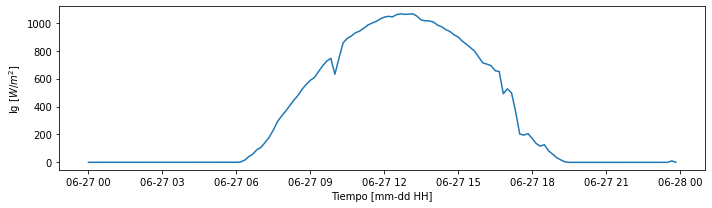

In [9]:
dia = find_Emax(df)

In [10]:
dia

Timestamp('2018-06-27 00:00:00')

### Segunda funci'on

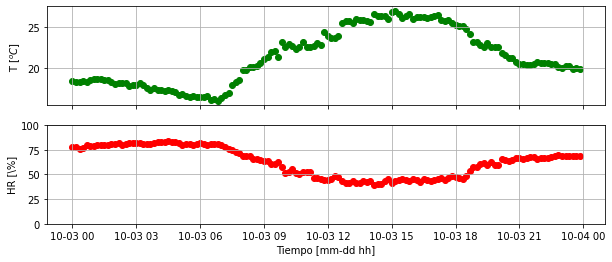

In [11]:
dia = '2018-10-03'
ruta = '../../img/'
To = df.To
HR = df.RH
fig, ax = plt.subplots(2,figsize=(10,4),sharex=True)

ax[0].scatter(To.loc[dia].index,To.loc[dia],color='g')
ax[1].scatter(HR.loc[dia].index,HR.loc[dia],color='r')

ax[0].set_ylabel('T [$^oC$]')
ax[1].set_ylabel('HR [\%]')

ax[1].set_ylim(0,100)

ax[0].grid()
ax[1].grid()

ax[1].set_xlabel('Tiempo [mm-dd hh]')

nombre = dia.replace('-','') + '_ToHR.png'
archivo = ruta + nombre
plt.savefig(archivo)


###  Creaci'on de funci'on

In [12]:
dia = '2018-10-03'
ruta = '../../img/'
To = df.To
HR = df.RH

def graph_ToHR(To,HR,ruta,dia):
    ''' Grafica Temperatura y Humedad Relativa de un dia especifico 
    con formato YYMMDD_ToHR.png

    Parametros
    ----------
    To   : Serie temporal que contiene la temperatura exterior
    HR   : Serie temporal que contiene la humedad relativa
    ruta : ruta al directorio a guardar la imagen
    dia  : str de fecha con formato YYYY-MM-DD
    '''
    fig, ax = plt.subplots(2,figsize=(10,4),sharex=True)

    ax[0].scatter(To.loc[dia].index,To.loc[dia],color='g')
    ax[1].scatter(HR.loc[dia].index,HR.loc[dia],color='r')

    ax[0].set_ylabel('T [$^oC$]')
    ax[1].set_ylabel('HR [\%]')

    ax[1].set_ylim(0,100)

    ax[0].grid()
    ax[1].grid()

    ax[1].set_xlabel('Tiempo [mm-dd hh]')

    nombre = dia.replace('-','') + '_ToHR.png'
    archivo = ruta + nombre
    plt.savefig(archivo)
    


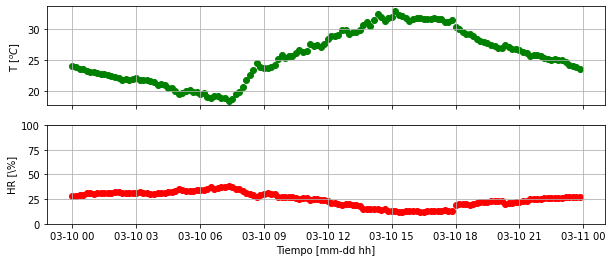

In [13]:
graph_ToHR(To,HR,'../../img','2018-03-10') 